In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andreaspc","key":"ec1da439f317e2f1e22686ac13d62844"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 96% 218M/228M [00:02<00:00, 69.1MB/s]
100% 228M/228M [00:02<00:00, 81.7MB/s]


In [ ]:
!unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df = df[['budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'title']]
df.head()

,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [ ]:
df.isna().sum()

budget            0
revenue           6
runtime         263
vote_count        6
vote_average      6
title             6
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
title           0
dtype: int64

In [ ]:
df['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [ ]:
len(df)

45203

In [ ]:
df2 = df[df['vote_count'] > 30]

In [ ]:
len(df), len(df2)

(45203, 12178)

In [ ]:
df2.head()

,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [ ]:
from sklearn import preprocessing

In [ ]:
minmax = preprocessing.MinMaxScaler().fit_transform(df2.drop('title', axis=1))
minmax

array([[7.89473684e-02, 1.33988060e-01, 9.23603193e-02, 3.83366562e-01,
        8.10526316e-01],
       [1.71052632e-01, 9.42613127e-02, 1.18586089e-01, 1.69609798e-01,
        7.26315789e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 4.34349188e-03,
        6.84210526e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.46408210e-02, 4.27228710e-04,
        6.52631579e-01],
       [0.00000000e+00, 0.00000000e+00, 4.56100342e-03, 8.18855027e-03,
        8.73684211e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 8.11734549e-03,
        5.47368421e-01]])

In [ ]:
df3 = pd.DataFrame(minmax, index=df2.index, columns=df2.columns[:-1])

In [ ]:
df3

,budget,revenue,runtime,vote_count,vote_average
0,0.078947,0.133988,0.092360,0.383367,0.810526
1,0.171053,0.094261,0.118586,0.169610,0.726316
2,0.000000,0.000000,0.115165,0.004343,0.684211
3,0.042105,0.029216,0.144812,0.000214,0.642105
4,0.000000,0.027468,0.120867,0.010111,0.600000
...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053
45373,0.000000,0.000000,0.094641,0.000498,0.631579
45380,0.000000,0.000000,0.094641,0.000427,0.652632
45437,0.000000,0.000000,0.004561,0.008189,0.873684


In [ ]:
scr = []
for i in range(1, 21):
  score = KMeans(n_clusters=i).fit(df3).score(df3)
  print(score)
  scr.append(score)

-281.0031098516682
-198.5775883939566
-127.33958398552366
-106.07304224497129
-88.26089979389178
-78.76287322986731
-70.63970029751407
-63.36267729233453
-59.47530564890444
-55.7388052111602
-52.01482874976763
-49.65621825989109
-47.31422566782854
-45.05753081671953
-43.2719071141807
-41.414469977964536
-39.82669529338959
-38.7159460058714
-37.32039677749309
-35.63066762290917


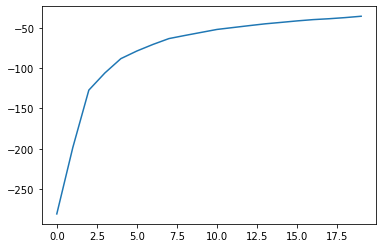

In [ ]:
plt.plot(scr)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df3['clusters'] = kmeans.labels_

In [ ]:
df3

,budget,revenue,runtime,vote_count,vote_average,clusters
0,0.078947,0.133988,0.092360,0.383367,0.810526,2
1,0.171053,0.094261,0.118586,0.169610,0.726316,1
2,0.000000,0.000000,0.115165,0.004343,0.684211,4
3,0.042105,0.029216,0.144812,0.000214,0.642105,4
4,0.000000,0.027468,0.120867,0.010111,0.600000,4
...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,4
45373,0.000000,0.000000,0.094641,0.000498,0.631579,4
45380,0.000000,0.000000,0.094641,0.000427,0.652632,4
45437,0.000000,0.000000,0.004561,0.008189,0.873684,0


(array([3745.,    0., 1115.,    0.,    0.,  260.,    0., 2270.,    0.,
        4788.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

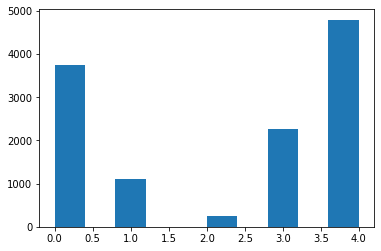

In [ ]:
plt.hist(df3['clusters'])

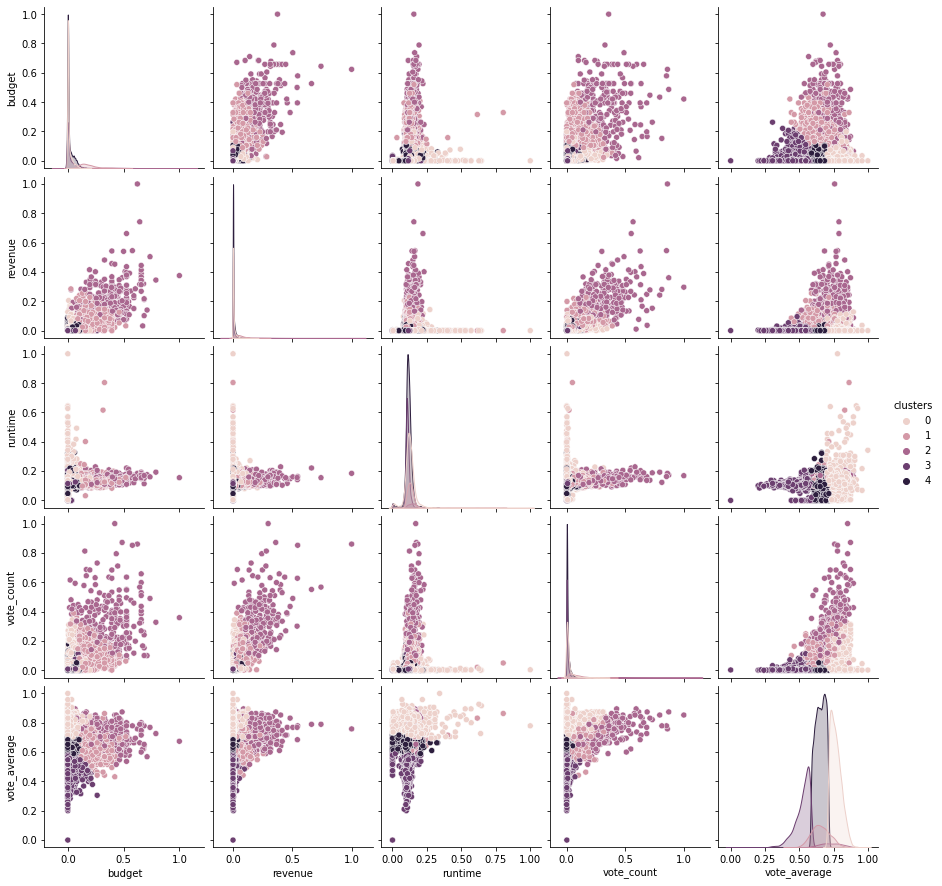

In [ ]:
sns.pairplot(df3, hue='clusters')

In [ ]:
df3['title'] = df2['title']
df3

,budget,revenue,runtime,vote_count,vote_average,clusters,title
0,0.078947,0.133988,0.092360,0.383367,0.810526,2,Toy Story
1,0.171053,0.094261,0.118586,0.169610,0.726316,1,Jumanji
2,0.000000,0.000000,0.115165,0.004343,0.684211,4,Grumpier Old Men
3,0.042105,0.029216,0.144812,0.000214,0.642105,4,Waiting to Exhale
4,0.000000,0.027468,0.120867,0.010111,0.600000,4,Father of the Bride Part II
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,4,Frankenstein Created Woman
45373,0.000000,0.000000,0.094641,0.000498,0.631579,4,Take Me
45380,0.000000,0.000000,0.094641,0.000427,0.652632,4,The Incredible Jessica James
45437,0.000000,0.000000,0.004561,0.008189,0.873684,0,In a Heartbeat
